In [1]:
import time
import gc

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

from py.od_perturber import od_perturber
from py.output_reader import output_reader
from py.tap_trial import tap_trial

plt.rcParams.update({'font.size': 12})

# Austin case study

This network represents the city of Austin, TX in the early 2000s. Suppose there was some uncertainty about how the city would grow in the next 10 years, how would that affect the output metrics and, consequently, the ranking of different investment alternatives?

In [2]:
net = 'Austin_sdb'
netFilename = 'inputs/{}_net.txt'.format(net)
tripsFilename = 'inputs/{}_trips.txt'.format(net)

ten_year_growth_factor = lambda x: x**10
ten_year_growth_factor(1.01)

1.1046221254112045

## Base case: no growth

In [15]:
start = time.time()
df0, tstt0, wvc0, vmt0, demand0, od0 = tap_trial(netFilename, tripsFilename, norm_mean=1, norm_sd=0, returnDataFrame=True, returnODinfo=True)
print(time.time()-start)
print('Time elapsed: {:.2f}s'.format(runtime208))
print('Total demand: {}'.format(demand0))
print('        TSTT: {}'.format(tstt0))
print('Weighted V/C: {}'.format(wvc0))
print('         VMT: {}'.format(vmt0))
df0.head()

Total demand: 695013.0
        TSTT: 19078380.944744684
Weighted V/C: 1.1880369626497258
         VMT: 33140792180.995224


,flow,cost,der,capacity,length
link,,,,,
"(3782,3783)",10963.594927,0.571308,0.000134,5900.0,739.2
"(3843,3833)",10132.956848,0.742115,0.000166,5900.0,1161.6
"(3832,3850)",10135.104398,0.674974,0.000151,5900.0,1056.0
"(3783,3843)",10057.532941,0.530723,0.000118,5900.0,844.8
"(3873,3874)",10091.714209,0.467928,0.000104,5900.0,739.2


In [5]:
ref_flows = df0['flow']
ref_costs = df0['cost']
df0.loc[(df0['flow']).sort_values(ascending=False).index,].head()

,flow,cost,der,capacity,length
link,,,,,
"(4163,3555)",22113.099856,0.375360,0.000044,11800.0,475.2
"(4162,4163)",21687.924865,0.912729,0.000106,11800.0,1214.4
"(3555,3556)",21592.974873,1.491427,0.000173,11800.0,2006.4
"(4281,6130)",20697.959268,0.318725,0.000036,11800.0,475.2
"(6130,4162)",20697.959268,0.672865,0.000076,11800.0,1003.2


In [35]:
df0.to_csv('output/data/austin_scale_1.csv')

## Scenario 1: 2.08% annual growth

In [6]:
start = time.time()
df208, tstt208, wvc208, vmt208, rmse208, demand208, od208 = tap_trial(
    netFilename, tripsFilename, norm_mean=ten_year_growth_factor(1.0208), norm_sd=0, true_costs=ref_costs, returnDataFrame=True, returnODinfo=True)
runtime208 = time.time()-start
print('Time elapsed: {:.2f}s'.format(runtime208))
print('Total demand: {}'.format(demand208))
print('        TSTT: {}'.format(tstt208))
print('Weighted V/C: {}'.format(wvc208))
print('         VMT: {}'.format(vmt208))
print('  times RMSE: {}'.format(rmse208))
df208.head()

Time elapsed: 1601.46s
Total demand: 853885.3223849998
        TSTT: 36996508.96022457
Weighted V/C: 1.422325926381649
         VMT: 41205462526.42639
  times RMSE: 6.705408306496341


,flow,cost,der,capacity,length
link,,,,,
"(3782,3783)",13061.852953,0.943119,0.000226,5900.0,739.2
"(3843,3833)",12188.989281,1.201671,0.000289,5900.0,1161.6
"(3832,3850)",11836.898348,1.003950,0.000240,5900.0,1056.0
"(3783,3843)",11909.253411,0.817201,0.000196,5900.0,844.8
"(3873,3874)",12003.241188,0.731347,0.000175,5900.0,739.2


In [36]:
df208.to_csv('output/data/austin_scale_208.csv')

## Scenario 2: 3% annual growth

In [7]:
start = time.time()
df3, tstt3, wvc3, vmt3, rmse3, demand3, od3 = tap_trial(
    netFilename, tripsFilename, norm_mean=ten_year_growth_factor(1.03), norm_sd=0, 
    true_costs=ref_costs, 
    #true_flows=ref_flows, #focus_link = most_congested_link_id,
    returnDataFrame=True, returnODinfo=True)
runtime3 = time.time()-start
print('Time elapsed: {:.2f}s'.format(runtime3))
print('Total demand: {}'.format(demand3))
print('        TSTT: {}'.format(tstt3))
print('Weighted V/C: {}'.format(wvc3))
print('         VMT: {}'.format(vmt3))
print('  times RMSE: {}'.format(rmse3))
df3.head()

Time elapsed: 1701.14s
Total demand: 934039.315658
        TSTT: 51753442.94129026
Weighted V/C: 1.5424473939411618
         VMT: 45352622967.527405
  times RMSE: 11.863839300613174


,flow,cost,der,capacity,length
link,,,,,
"(3782,3783)",14228.948198,1.244487,0.000292,5900.0,739.2
"(3843,3833)",13252.883859,1.551413,0.000371,5900.0,1161.6
"(3832,3850)",12774.772193,1.257608,0.000302,5900.0,1056.0
"(3783,3843)",12962.659322,1.052512,0.000253,5900.0,844.8
"(3873,3874)",13113.697463,0.954910,0.000229,5900.0,739.2


In [8]:
df3.loc[(df3['flow']).sort_values(ascending=False).index,].head(10)

,flow,cost,der,capacity,length
link,,,,,
"(4163,3555)",29285.289744,0.881207,0.000102,11800.0,475.2
"(4162,4163)",28666.902033,2.095245,0.000245,11800.0,1214.4
"(3555,3556)",28295.578821,3.314063,0.000390,11800.0,2006.4
"(6130,4162)",27377.349072,1.486558,0.000177,11800.0,1003.2
"(4281,6130)",27377.349072,0.704159,0.000084,11800.0,475.2
"(4298,4249)",26099.847043,2.552584,0.000306,11800.0,2006.4
"(6154,4281)",25411.648244,1.113250,0.000134,11800.0,950.4
"(4300,4298)",24402.630805,1.260018,0.000151,11800.0,1214.4
"(4246,4280)",22702.861048,1.207236,0.000143,11800.0,1425.6


In [37]:
df3.to_csv('output/data/austin_scale_3.csv')

## Scenario 3: Geospatially adjusted growth

Suppose we had more precision in our estimates, allowing us to apply different growth factors to different sections of the city.

In [9]:
gfs = { # 5 different regions of the city correspond to three different scaling factors
    15: ten_year_growth_factor(1.0275), #west and central code to 1 and 5, respectively
    23: ten_year_growth_factor(1.0325), #south and north code to 2 and 3, respectively
    4: ten_year_growth_factor(1.03) #east codes to 4
}

df = pd.read_excel('inputs/ATX_PARTITIONED.xlsx', index_col=0)
df.head(50)

,X,Y,Field4
Node,,,
1,-97861763,30550045,1
2,-97873341,30595955,3
3,-97842574,30537706,3
4,-97967226,30531993,1
5,-97901257,30496550,1
6,-97882086,30460701,1
7,-97827879,30498174,1
8,-98083907,30434403,1
9,-98053644,30488843,1


In [10]:
west_central = set(df[(df['Field4']==1) | (df['Field4']==5)].index.tolist())
south_north = set(df[(df['Field4']==2) | (df['Field4']==3)].index.tolist())
east = set(df[(df['Field4']==4)].index.tolist())
assert(len(west_central) + len(south_north) + len(east) == df.shape[0])

In [11]:
start = time.time()
od_perturber(tripsFilename, 'normal', norm_mean=gfs[15], norm_sd=0, nodesPerturbedIfOrig=west_central)
od_perturber('trips_perturbed.tntp', 'normal', norm_mean=gfs[23], norm_sd=0, nodesPerturbedIfOrig=south_north)
dfr, tsttr, wvcr, vmtr, rmser, demandr, odr = tap_trial(
    netFilename, 'trips_perturbed.tntp', norm_mean=gfs[4], norm_sd=0, nodesPerturbedIfOrig=east, 
    true_costs=ref_costs,
#     true_flows=ref_flows, focus_link = most_congested_link_id,
    returnDataFrame=True, returnODinfo=True)
runtimer = time.time()-start
print('Time elapsed: {:.2f}s'.format(runtimer))
print('Total demand: {}'.format(demandr))
print('        TSTT: {}'.format(tsttr))
print('Weighted V/C: {}'.format(wvcr))
print('         VMT: {}'.format(vmtr))
print('   Time RMSE: {}'.format(rmser))
dfr.head()

Time elapsed: 1671.36s
Total demand: 939298.0849039998
        TSTT: 51128105.50654777
Weighted V/C: 1.5491523986353113
         VMT: 45702076517.221504
   Time RMSE: 10.45762086384653


,flow,cost,der,capacity,length
link,,,,,
"(3782,3783)",14241.938767,1.248289,0.000293,5900.0,739.2
"(3843,3833)",13245.472107,1.548665,0.000370,5900.0,1161.6
"(3832,3850)",12749.619312,1.250031,0.000300,5900.0,1056.0
"(3783,3843)",12974.618194,1.055536,0.000253,5900.0,844.8
"(3873,3874)",13134.530035,0.959687,0.000230,5900.0,739.2


In [38]:
dfr.to_csv('output/data/austin_scale_r.csv')

## Observe variance in link ranking

In [12]:
dfr.loc[(dfr['flow']).sort_values(ascending=False).index,].head(10)

,flow,cost,der,capacity,length
link,,,,,
"(4163,3555)",29381.921494,0.891149,0.000103,11800.0,475.2
"(4162,4163)",28761.339145,2.118534,0.000248,11800.0,1214.4
"(3555,3556)",28375.710930,3.345438,0.000393,11800.0,2006.4
"(6130,4162)",27474.250483,1.503759,0.000178,11800.0,1003.2
"(4281,6130)",27474.250483,0.712307,0.000085,11800.0,475.2
"(4298,4249)",26256.612882,2.600984,0.000312,11800.0,2006.4
"(6154,4281)",25502.050591,1.125408,0.000135,11800.0,950.4
"(4300,4298)",24639.564912,1.296408,0.000156,11800.0,1214.4
"(4246,4280)",22808.817774,1.222503,0.000145,11800.0,1425.6


In [13]:
df3.loc[(df3['flow']).sort_values(ascending=False).index,].head(10)

,flow,cost,der,capacity,length
link,,,,,
"(4163,3555)",29285.289744,0.881207,0.000102,11800.0,475.2
"(4162,4163)",28666.902033,2.095245,0.000245,11800.0,1214.4
"(3555,3556)",28295.578821,3.314063,0.000390,11800.0,2006.4
"(6130,4162)",27377.349072,1.486558,0.000177,11800.0,1003.2
"(4281,6130)",27377.349072,0.704159,0.000084,11800.0,475.2
"(4298,4249)",26099.847043,2.552584,0.000306,11800.0,2006.4
"(6154,4281)",25411.648244,1.113250,0.000134,11800.0,950.4
"(4300,4298)",24402.630805,1.260018,0.000151,11800.0,1214.4
"(4246,4280)",22702.861048,1.207236,0.000143,11800.0,1425.6


In [14]:
df3.to_csv('output/data/austin_scale_regional.csv')

## Plot changes between the three scenarios

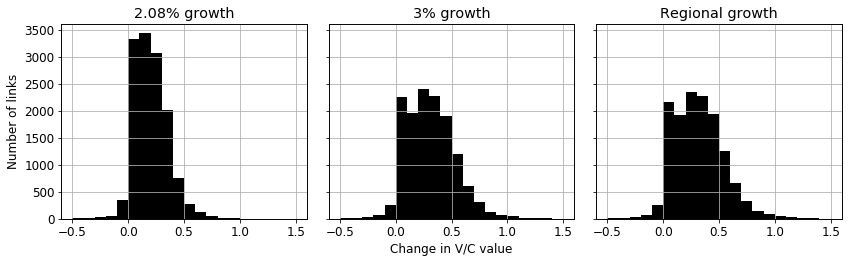

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharex=True, sharey=True)
bins = 20
rg = (-.5, 1.5)
vc0 = (df0['flow']/df0['capacity'])
vc208 = (df208['flow']/df208['capacity'])
vc3 = (df3['flow']/df3['capacity'])
vcr = (dfr['flow']/dfr['capacity'])
plt.sca(axes[0])
(vc208 - vc0).hist(bins=bins, range=rg, color='k')
ax = axes[0].twinx()
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_title('2.08% growth')
# axes[0].legend()
plt.sca(axes[1])
(vc3 - vc0).hist(bins=bins, range=rg, color='k')
ax = axes[1].twinx()
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_title('3% growth')
# axes[1].legend()
axes[0].set_ylabel('Number of links')
plt.sca(axes[2])
(vcr - vc0).hist(bins=bins, range=rg, color='k')
ax = axes[2].twinx()
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_title('Regional growth')
# axes[2].legend()
axes[1].set_xlabel('Change in V/C value')
# fig.suptitle('Change in V/C due to growth rate assumption')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('output/plots/Austin_hists.png', dpi='figure')
plt.show()